# Assess the sample reproducibility of two runs of the same sample

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
from __future__ import division, print_function
import sys as sys
sys.path.append('../Utils')
import os as os
import numpy as np
import scipy.stats
import hclusterplot as hcp
import myboxplot as mbp
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from IPython.display import display, HTML
import amplotlib as amplotlib
import amutils as amutils

##Project specific parameters that must be set

In [2]:
pathogen_name = 'Influenza'
project_name = 'H7N9';

# Names of HA and NA proteins that are on the array. 
prot_names = ['SHA_ha', 'SHA_na', 'Cal_ha', 'Cal_na']
prot_strs = ['H7', 'N9', 'H1', 'N1']  # The names for figure plotting

# Labels of the experimental groups (not including BSA, or any other background):
exp_groups = ['Normal', 'Obese']
exp_group_prefixes = ['Obese_', 'Normal_']

# Summary statistics (breadth and magnitude) that we would like to visualize. 
# if set to empty, will plot all.
arr_summary_stats = ['H7_mag', 'N9_mag', 'H1_mag', 'N1_mag']

# Paths:
#ROOT_PATH = '/Users/thertz/Dropbox/HertzLab/'
ROOT_PATH = 'c:/Users/tomer.hertz/Dropbox/HertzLab/'
load_path = os.path.join(ROOT_PATH, 'ArrayData', pathogen_name, project_name)
fig_path = load_path + 'Figs/'

## Additional parameters that have usual defaults:

In [3]:
type_flag  = 'median' # uses the median over replicates of an antigen. Can also be 'mean'
color_flags = ['635']
color_tags = ['IgG']
font_size = 12

y_lims = [0, 65000] # max height of y in graphs
y_lims_summary = [0, 32500] # max height of y in summary stat graphs

# summary stat used for group comparisons and for plotting gropu responses - and cluster responses
summary_method = 'median' 

## Load data by experimental dates and subtract BSA background:

In [4]:
# Dates of experiments, each one is a directory where GPR files are saved.
experiment_date1 = ['06_03_2015'] 
arr_df1, antigens = amutils.load_array_data(load_path, project_name, experiment_date1)
arr_df1, bg_df1 = amutils.backgound_subtract_array_data(arr_df1, antigens, bg_name='BSA')

experiment_date2 = ['06_03_2015'] 
arr_df2, antigens = amutils.load_array_data(load_path, project_name, experiment_date1)
arr_df2, bg_df2 = amutils.backgound_subtract_array_data(arr_df2, antigens)

c:/Users/tomer.hertz/Dropbox/HertzLab/ArrayData\Influenza\H7N9\06_03_2015\H7N9_06_03_15_arrayData_median.mat
c:/Users/tomer.hertz/Dropbox/HertzLab/ArrayData\Influenza\H7N9\06_03_2015\H7N9_06_03_15_arrayData_median.mat


## Initialize all index dictionaries (can be done once for both dataframes)

In [5]:
ind_dict, time_dict, group_labels, group_inds = \
    amutils.initialize_indexing_dictionaries(arr_df2, prot_names, prot_strs, exp_groups)

arr_df1 = amutils.add_numeric_labels_to_arr_df(arr_df1, group_labels)

## Extract specific data of samples of interest:
assumes that data in in a arr_df format and index is used to select ptids

In [6]:
ptid1 = 'Obese_1'
ptid2 = 'Obese_3'

resp1 = arr_df1[arr_df1.index.isin([ptid1])][ind_dict['SHA_ha']]
resp2 = arr_df2[arr_df2.index.isin([ptid2])][ind_dict['SHA_ha']]

resp_mat = resp1.append(resp2)

ptid_labels = [ptid1, ptid2]

## Plot reproducibility plots:

['Obese_1', 'Obese_3']


C:\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


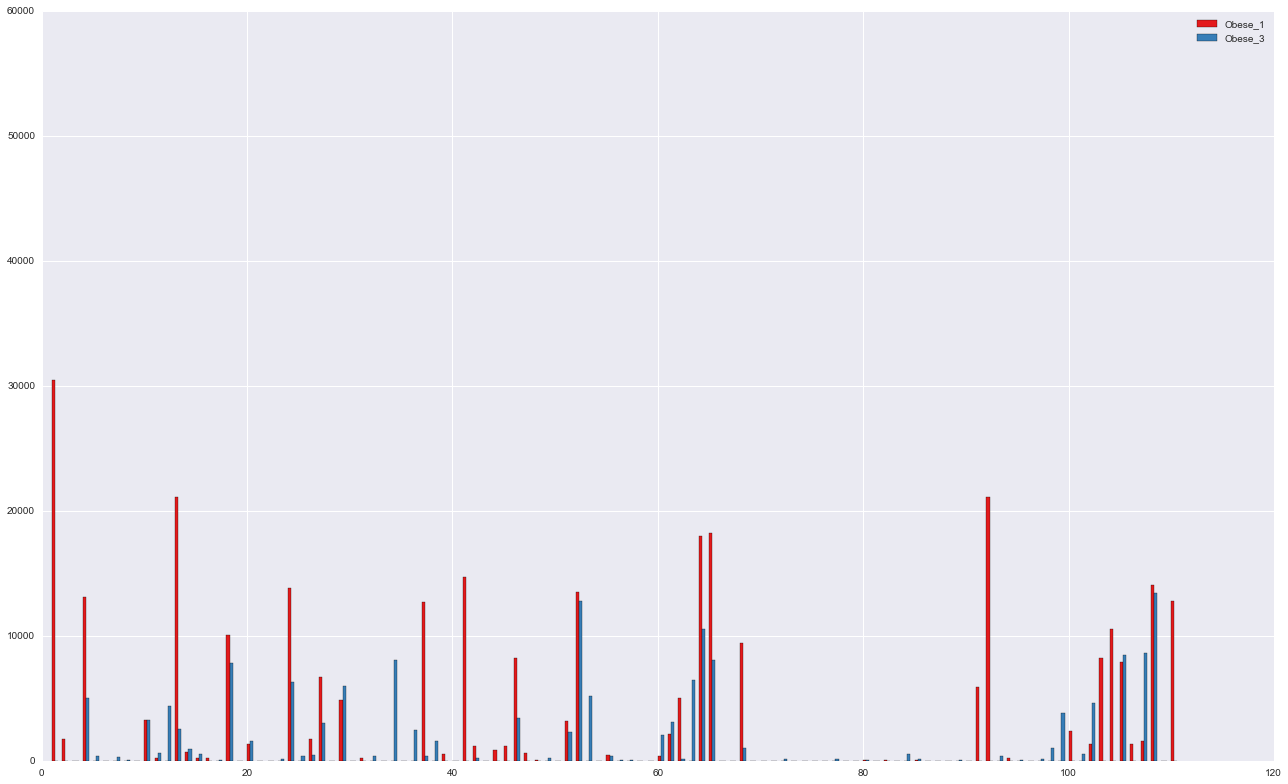

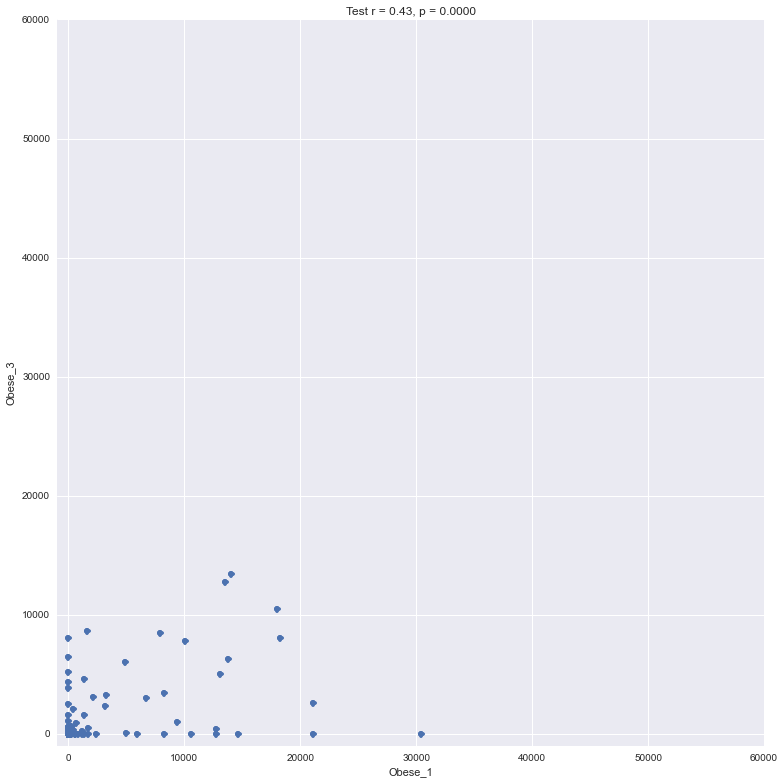

In [7]:
amplotlib.plot_reproducibility_plots(resp_mat=resp_mat, ptid_labels=[ptid1, ptid2], subplot_flag=False,
                                     title_str="Test", plot_type='bar')